<a href="https://colab.research.google.com/github/JA4S/JANC/blob/main/examples/jax_eb_basic_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install JAX-AMR and import relevant libraries

In [1]:
# Copyright © 2025 Haocheng Wen
# SPDX-License-Identifier: MIT

!pip install git+https://github.com/JA4S/JAX-AMR.git
!wget https://raw.githubusercontent.com/JA4S/JAX-AMR/main/examples/simple_solver_eb.py

  Cloning https://github.com/JA4S/JAX-AMR.git to /tmp/pip-req-build-umvgcruq
  Running command git clone --filter=blob:none --quiet https://github.com/JA4S/JAX-AMR.git /tmp/pip-req-build-umvgcruq
  Resolved https://github.com/JA4S/JAX-AMR.git to commit 1b91dc11c639f296708c407dcccc4916452cc1fe
  Preparing metadata (setup.py) ... done
  Created wheel for jaxamr: filename=jaxamr-0.1-py3-none-any.whl size=14543 sha256=4c1776d86859d4ea5a17a95cef0c3f1ae848fee3d7f59a2eed3a9eb345cb3e8c
  Stored in directory: /tmp/pip-ephem-wheel-cache-06dawy5f/wheels/d9/bd/41/7650f74abb843dacaedad51fa30a349daba1c5b4f30994990c
Successfully built jaxamr
--2025-08-14 12:20:35--  https://raw.githubusercontent.com/JA4S/JAX-AMR/main/examples/simple_solver_eb.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respon

In [2]:
from jaxeb import eb
import simple_solver_eb as solver

import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

jax.config.update("jax_enable_x64", True)
jax.config.update('jax_platform_name', 'cpu')

#Set computation parameters

In [3]:
x_min, y_min = 0.0, 0.0
Lx = 2.0
Ly = 1.0

nx = 400
ny = 200

dx = Lx / nx
dy = Ly / ny

# Generate vertices of a circle
center_x = 1.25
center_y = 0.5
radius = 0.2
num_points = 72
angles = jnp.linspace(2 * jnp.pi, 0, num_points, endpoint=False)
x_points = center_x + radius * jnp.cos(angles)
y_points = center_y + radius * jnp.sin(angles)

polygon_vertices = jnp.stack([x_points, y_points], axis=1)

if jnp.allclose(polygon_vertices[0], polygon_vertices[-1]):
    polygon_vertices = polygon_vertices[:-1]
    print('Warning: The last vertice is coincided with the fisrt one. The last vertice is deleted.')

#Initialize EB

/usr/local/lib/python3.11/dist-packages/jax/_src/numpy/lax_numpy.py:5721: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  return array(a, dtype=dtype, copy=bool(copy), order=order, device=device)



 EB initialzed. 316 cut cells are found.

--- Part of cut cell information ---

--- Cell (210, 91) ---
cut points: ['(1.0550, 0.4564)', '(1.0542, 0.4600)']
cut length: 0.0036644813561579406
fluid centroid: (1.0524, 0.4574)
cut face normal: (-0.9763, -0.2164)
fluid area: 0.0000
切割边长度分数: [1.         0.2844763  0.84137221 1.        ]
neighbor type: [-1.  0.  0. -1.]

--- Cell (210, 92) ---
cut points: ['(1.0542, 0.4600)', '(1.0531, 0.4650)']
cut length: 0.0051194913015588095
fluid centroid: (1.0518, 0.4624)
cut face normal: (-0.9767, -0.2148)
fluid area: 0.0000
切割边长度分数: [0.84137221 1.         0.62144575 1.        ]
neighbor type: [ 0. -1.  0. -1.]

--- Cell (210, 93) ---
cut points: ['(1.0531, 0.4650)', '(1.0524, 0.4700)']
cut length: 0.005047583573495188
fluid centroid: (1.0514, 0.4674)
cut face normal: (-0.9906, -0.1370)
fluid area: 0.0000
切割边长度分数: [0.62144575 1.         0.48315621 1.        ]
neighbor type: [ 0. -1.  0. -1.]

--- Cell (210, 94) ---
cut points: ['(1.0524, 0.4700)', '(1

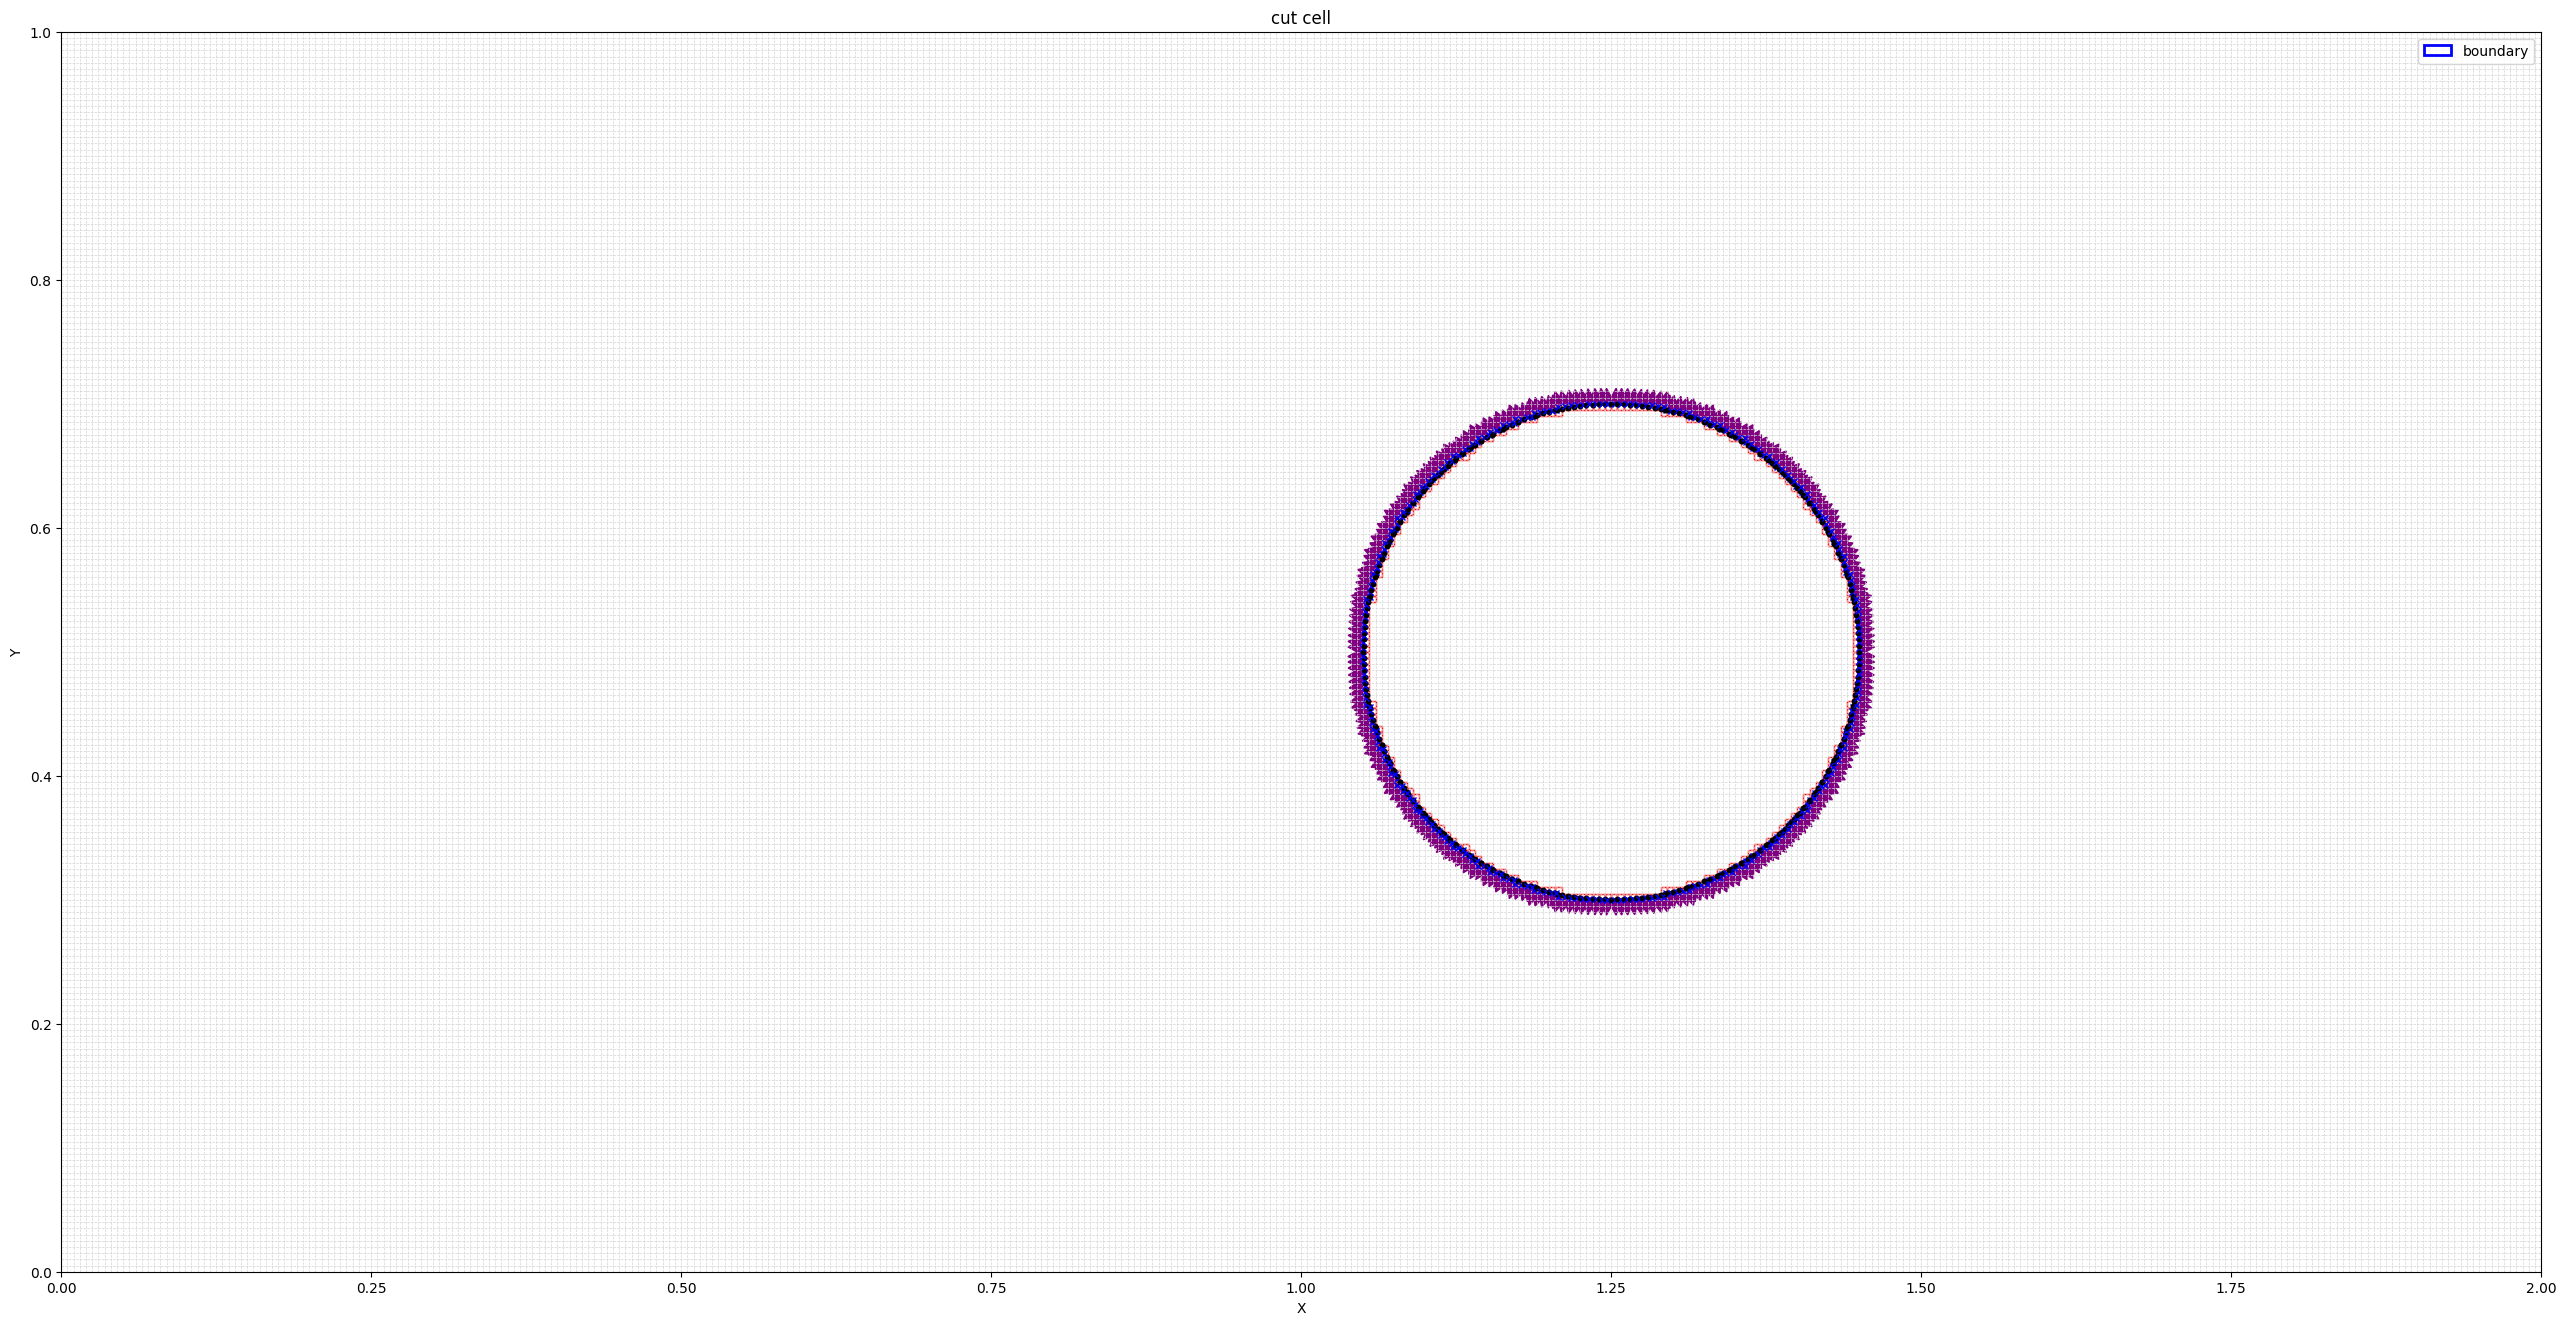

In [5]:
cell_info = eb.initialize(polygon_vertices, x_min, y_min, nx, ny, dx, dy, visual=True)

#initialize flow field and compute

In [8]:
X, Y, U = solver.initialize(x_min, y_min, Lx, Ly, nx, ny, cell_info['cell_type'])

cfl = 0.3
nt = 300 # computation step

for step in tqdm(range(nt), desc="Progress", unit="step"):

    U = solver.rk2(U, dx, dy, cfl, cell_info)

Progress:   0%|          | 0/300 [00:00<?, ?step/s]

#Result Visualization

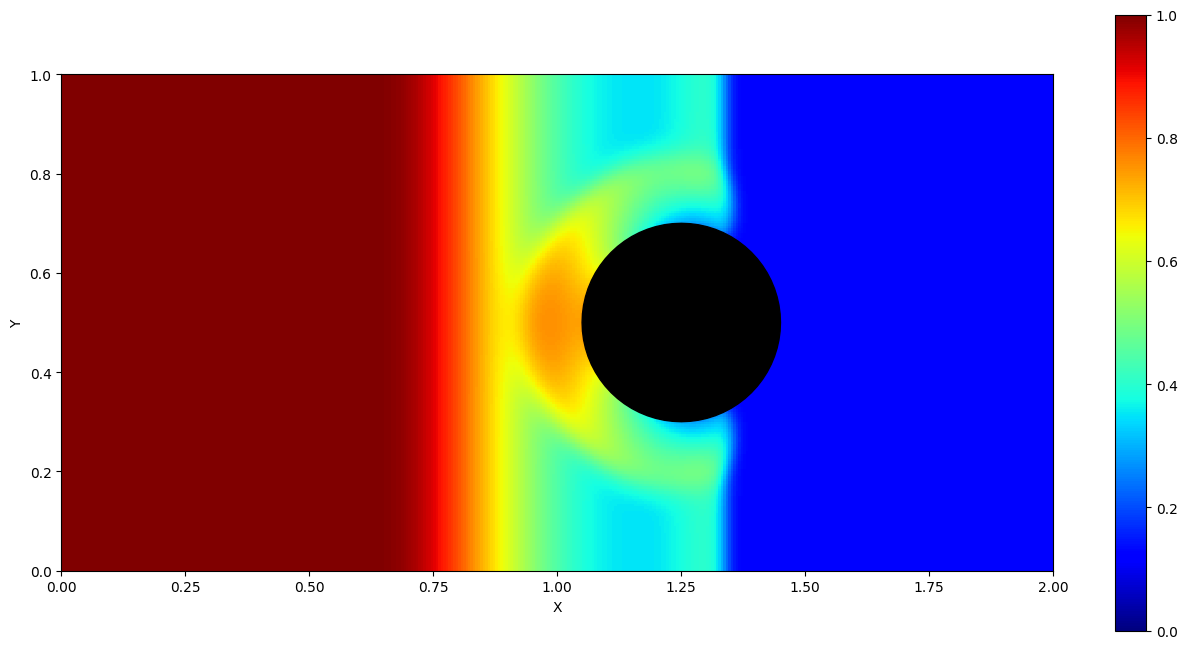

In [9]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.pcolormesh(X, Y, U[0,:,:], cmap='jet')
poly_x, poly_y = jnp.array(polygon_vertices)[:,0], jnp.array(polygon_vertices)[:,1]
plt.fill(poly_x, poly_y, color='black', alpha=1)
plt.colorbar()
plt.show()